In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from random import sample

In [4]:
df = pd.read_csv("trajectory.csv")
df.columns = ["time", "vehicle_id", "edge", "lane", "x", "y","toremove"]
del df['toremove']
df.head() # df now holds the data

,time,vehicle_id,edge,lane,x,y
0,0,flow_1.0,gneE0,gneE0_1,5.1,-4.8
1,0,flow_10.0,-gneE1,-gneE1_2,501.6,-494.9
2,0,flow_11.0,-gneE1,-gneE1_0,508.0,-494.9
3,0,flow_3.0,-gneE2,-gneE2_1,994.9,4.8
4,0,flow_6.0,-gneE3,-gneE3_1,495.2,494.9


In [5]:
# Obtain all the traces of a particular edge, here gneE0 is chosen
# df_edge = df[(df['vehicle_id'].isin(selected_vehicle_ids)) & (df['edge'] == 'gneE0')]
df_edge_gne0 = df[df['edge'] == 'gneE0'] # filter out all vehicles passing through gneE0
vehicle_ids_on_edge = df_edge_gne0['vehicle_id'].unique().tolist()
# selected_vehicle_ids = sample(vehicle_ids_on_edge, 200) # get 100 vehicle IDs found on the edge gneE0
selected_vehicle_ids = vehicle_ids_on_edge.copy()
# Obtain a traj_length trajectory for each vehicle in selected_vehicle_ids 
traj_anchor_min = 400
traj_anchor_max = 600
traj_length = 60
df_mini = df[df['vehicle_id'].isin(selected_vehicle_ids)]
output_df = pd.DataFrame(columns=df_mini.columns)

In [6]:
appended_ids = 0
appended_id_list = []
for id in selected_vehicle_ids:
    df_for_this_vehicle = df_mini[df_mini['vehicle_id'] == id]
    x_min = df_for_this_vehicle['x'].min()
    x_max = df_for_this_vehicle['x'].max()
    if x_min < traj_anchor_min and x_max > traj_anchor_max:
        extracted_df_of_this_vehicle = df_for_this_vehicle[(df_for_this_vehicle['x'] >= traj_anchor_min) & (df_for_this_vehicle['x'] <= traj_anchor_max)]
        t_min_of_traj_segment = extracted_df_of_this_vehicle['time'].min()
        t_max_of_traj_segment = t_min_of_traj_segment + traj_length
        tlim_extracted_df_of_this_vehicle = extracted_df_of_this_vehicle[extracted_df_of_this_vehicle['time']<=t_max_of_traj_segment]
        output_df = pd.concat([output_df, tlim_extracted_df_of_this_vehicle], ignore_index=True, sort=False)
        appended_ids += 1
        appended_id_list.append(id)
    else:
        # print('Vehicle ID {} does not travel a trajectory required: x \in ({},{})'.format(id, x_min, x_max))
        pass 
print('Appended {:d} ids into the DataFrame'.format(appended_ids))

Appended 108 ids into the DataFrame


In [9]:
for id in appended_id_list:
    x_col = output_df[output_df['vehicle_id'] == id]['x'].to_numpy()
    x_col -= x_col[0]
    output_df.loc[output_df['vehicle_id'] == id,'x'] = x_col

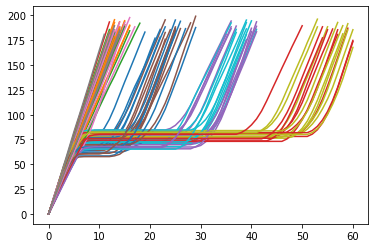

In [10]:
for id in appended_id_list:
    plt.plot(output_df[output_df['vehicle_id'] == id]['x'].to_numpy())